#### Objective(s):

This activity aims to perform regression analysis using polynomial regression

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build a regression model to predict the outcome using polynomial regression.
* Evaluate the performance of the regression model using polynomial regression

#### Resources:
* Jupyter Notebook
* internet_traffic_hist.csv




#### Procedure:

#### Using numpy polyfit to perform polynomial regression
Import the libraries and the data

In [127]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

Load the dataset

In [130]:
internet = '/content/drive/MyDrive/DATASETS/internet_traffic_hist-2.csv'

df_hist = pd.read_csv(internet)
df_hist.head(11)

,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009
5,308.791823,2010
6,379.980659,2011
7,495.840568,2012
8,616.207252,2013
9,752.103483,2014


Build the first order polynomial using numpy polyfit

The slope of line is 79.52710966244513.
The y intercept is -159457.12265833947.
The best fit simple linear regression line is 79.52710966244513x + -159457.12265833947.


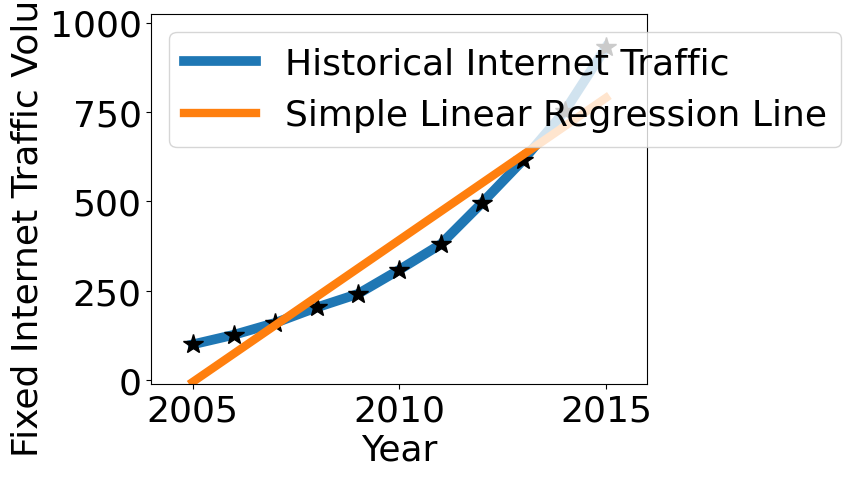

In [131]:
order = 1

# XY Plot of year and traffic
x = df_hist.year
y = df_hist.traffic

m, b = np.polyfit(x,y,order)

plt.plot(x, y, label = 'Historical Internet Traffic', linewidth = 7)
plt.plot(x, y,'*k', markersize = 15, label ='')
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 6)

print ('The slope of line is {}.'.format(m))
print ('The y intercept is {}.'.format(b))
print ('The best fit simple linear regression line is {}x + {}.'.format(m,b))


#Increase sligthly the axis sizes to make the plot more clear
plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1, y.iloc[-1]*1.1])

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.legend(loc = 'upper left')


# Increase default font size
plt.rcParams.update({'font.size': 26})
plt.show()

Build the model using Higher Order Polynomial (1 to 4)

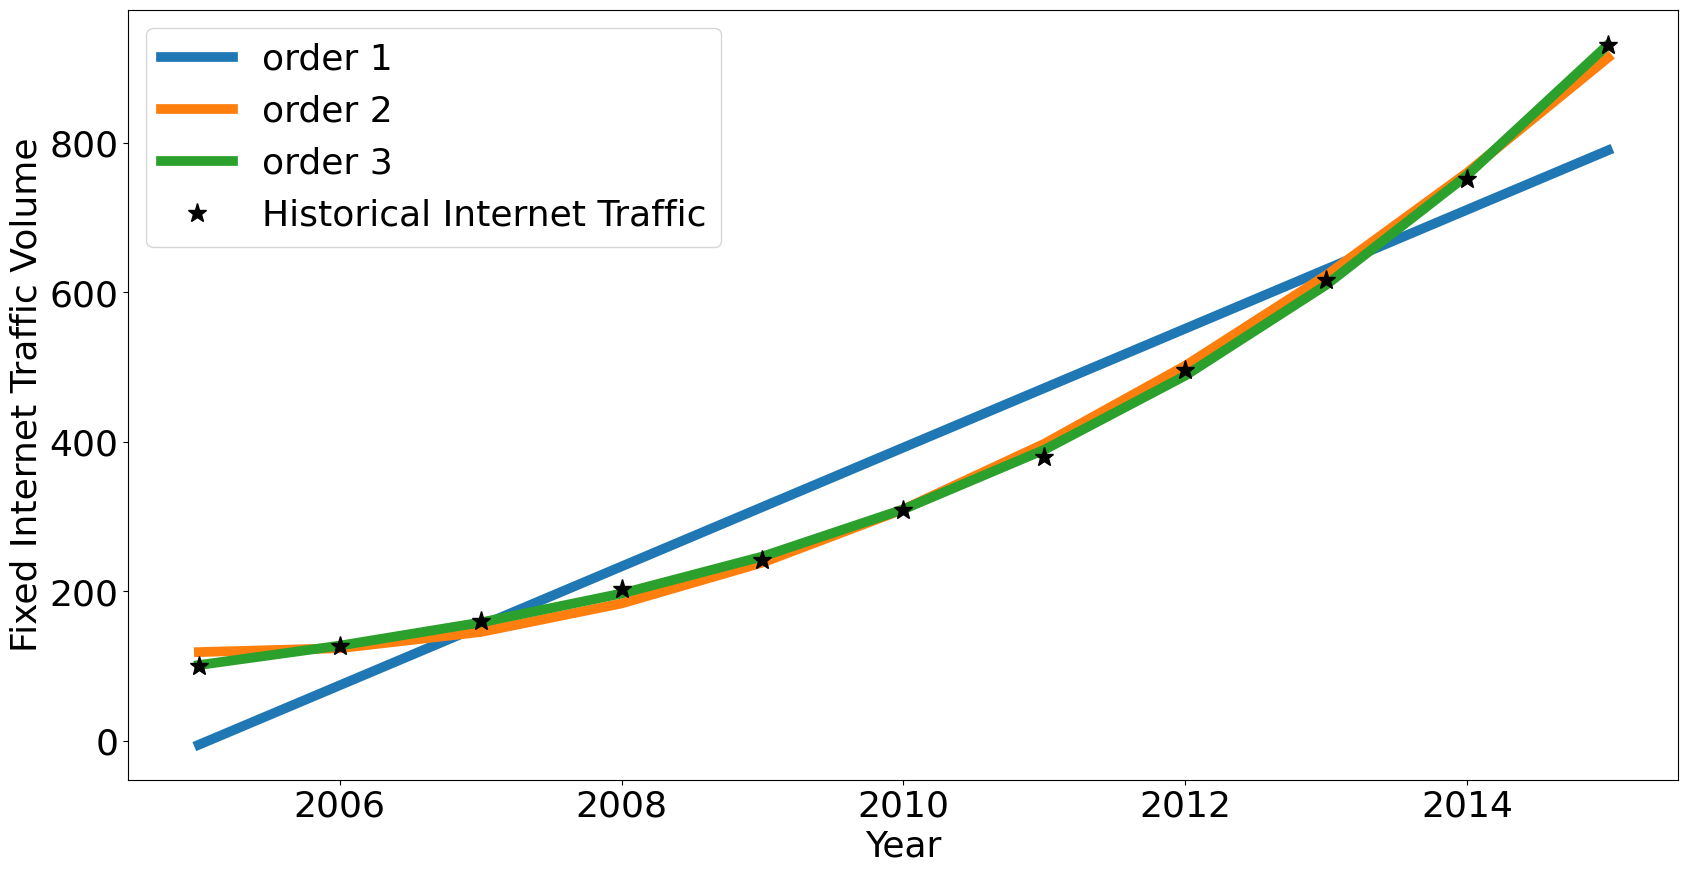

In [132]:
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)

plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models[0:3]:
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

plt.plot(x, y, '*k', markersize = 14, label = 'Historical Internet Traffic', linewidth = 7)
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')

plt.show()

Calculate the error for each order

In [133]:
# Calculate and store the erros
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)

    e = np.abs(y-p(x))        # absolute error
    mse = np.sum(e**2)/len(df_hist) # mse

    errors_hist.append(e)   #Store the absolute errors
    mse_hist.append(mse) # Store the mse

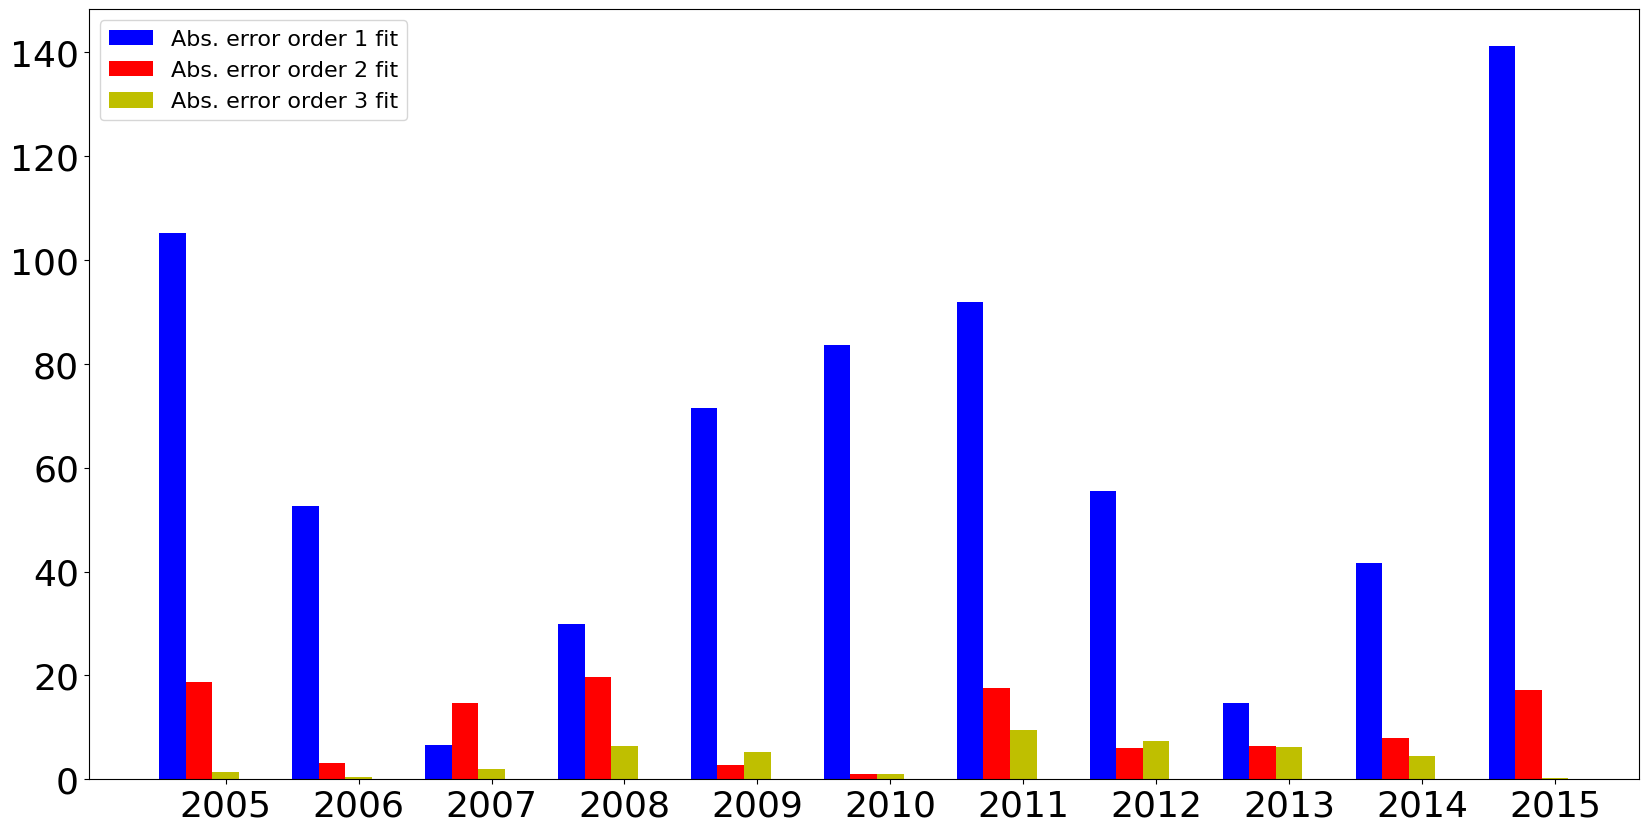

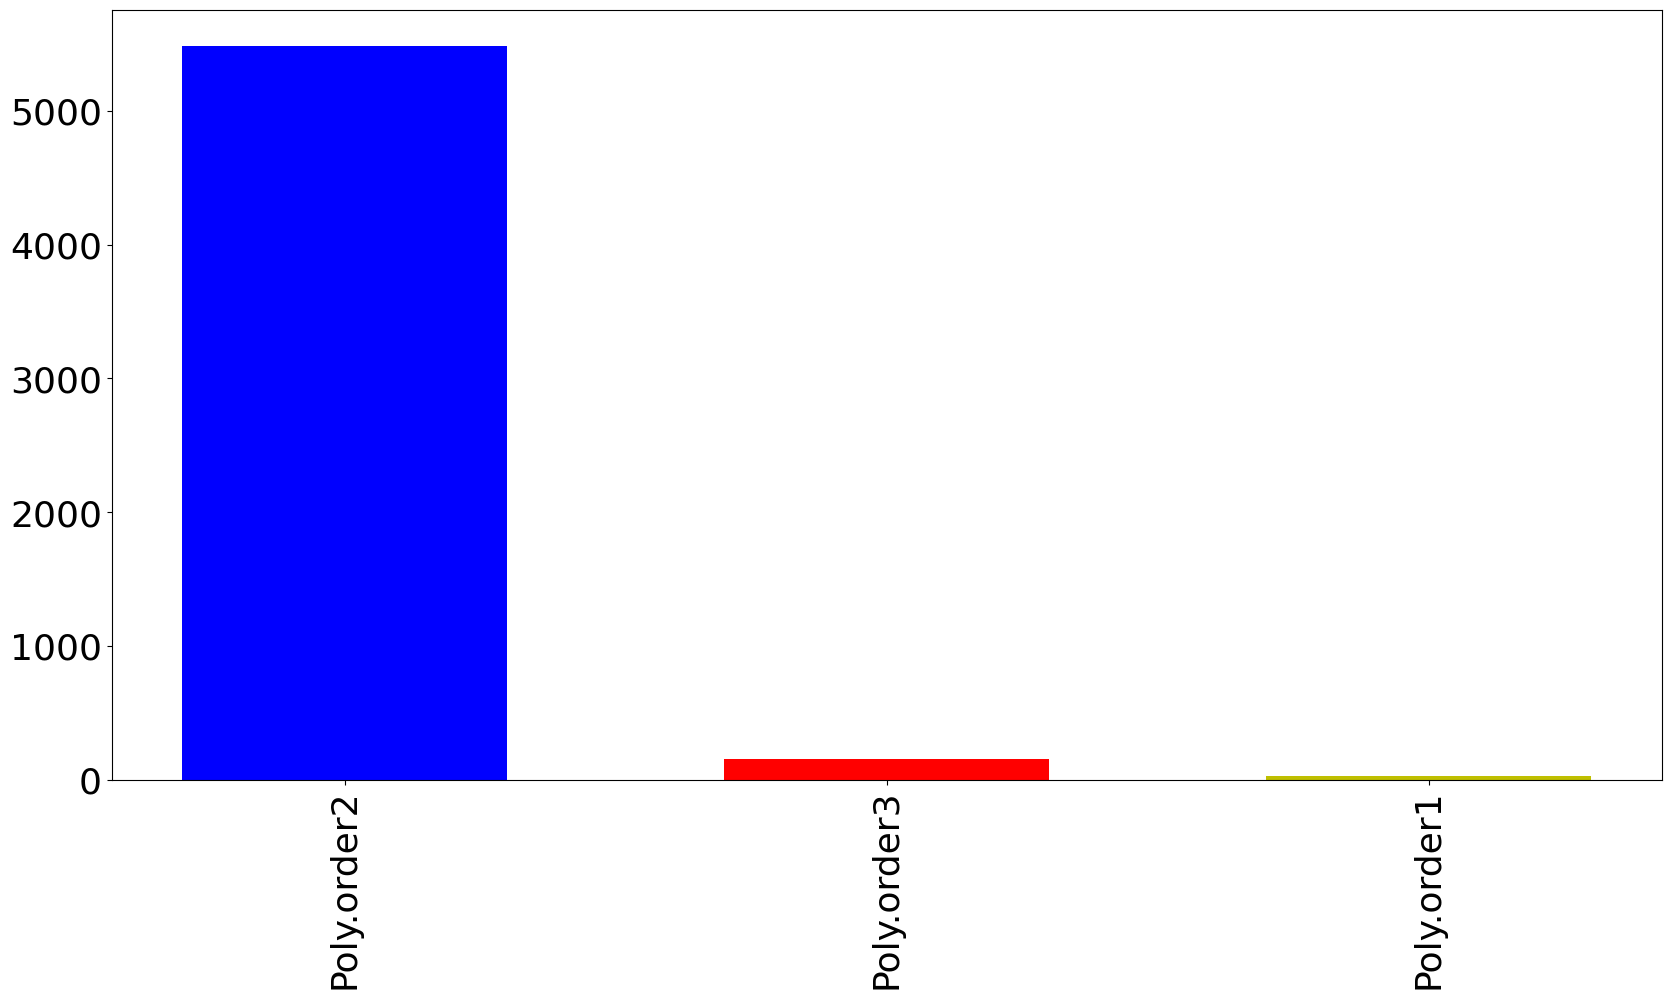

In [134]:
# Visualize fit error for each year

x = df_hist.year
width = 0.2   #size of the bar

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')

# "Prettyfy" the bar graph
ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

#Visualise MSE for each model
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2,3])
width = .6   #size of the bar

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')

ax.set_xticks(ticks=[0.0,1.0,2.0],labels={'Poly.order1', 'Poly.order2', 'Poly.order3'}, rotation=90)
plt.show()

Interpret the result of the fit error for each year

my interpretation of the fit error per order in the our polynomial regression is that as the o**rder of the polynomial regression (from the code above) increases** the **error between the model and the true value decreases**

In [135]:
# Polynomial function order
order = 3

x = df_hist.year.values      # regressor
y = df_hist.traffic.values   # regressand

# Fit the model, return the polynomial parameter values in a numpy array such that
# y = p[0]*x**order + p[1]*x*(order-1) ...

p_array = np.polyfit(x,y,order)

print(type(p_array), p_array)

# poly1d is a convenience class, used to encapsulate “natural” operations on polynomials
# so that said operations may take on their customary form in code

# wrap the p_array in a poly1 object
p = np.poly1d(p_array)

print(type(p), p)

# use the poly1d object to evaluate the value of the polynomial in a specific point
print('The value of the polynomial for x = 2020 is : {} '.format(p(2020)))

# compute the absolute error for each value of x and the MSE error for the estimated polynomial model
e = np.abs(y-p(x))
mse = np.sum(e**2)/len(x)

print('The estimated polynomial parameters are: {}'.format(p))
print('The errors for each value of x, given the estimated polynomial parameters are: \n {}'.format(e))
print('The MSE is :{}'.format(mse))

<class 'numpy.ndarray'> [ 4.83129404e-01 -2.90500578e+03  5.82252085e+06 -3.89005387e+09]
<class 'numpy.poly1d'>         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
The value of the polynomial for x = 2020 is : 2328.5784521102905 
The estimated polynomial parameters are:         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
The errors for each value of x, given the estimated polynomial parameters are: 
 [1.30743027 0.39125264 2.02722693 6.32983208 5.28394403 0.93069802
 9.41692212 7.34010081 6.27729748 4.48133933 0.16291521]
The MSE is :25.17218620372407


#### Using sklearn to perform polynomial regression

Import the necessary libraries

In [136]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Training the Polynomial Regression model  using degree 3

In [137]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(x.reshape(-1, 1))

In [138]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)


LinearRegression()

Predict the result using polynomial regression model

In [139]:
y_pred = lin_reg.predict(X_poly)


In [140]:
df = pd.DataFrame({'Real Values': y, 'Predicted Values':y_pred})

In [141]:
df

,Real Values,Predicted Values
0,100.000000,101.241620
1,126.933755,127.295559
2,160.303757,158.270686
3,203.390603,197.068289
4,241.292566,246.589652
5,308.791823,309.736069
6,379.980659,389.408823
7,495.840568,488.509205
8,616.207252,609.938500
9,752.103483,756.598000


Visualize the Polynomial Regression results

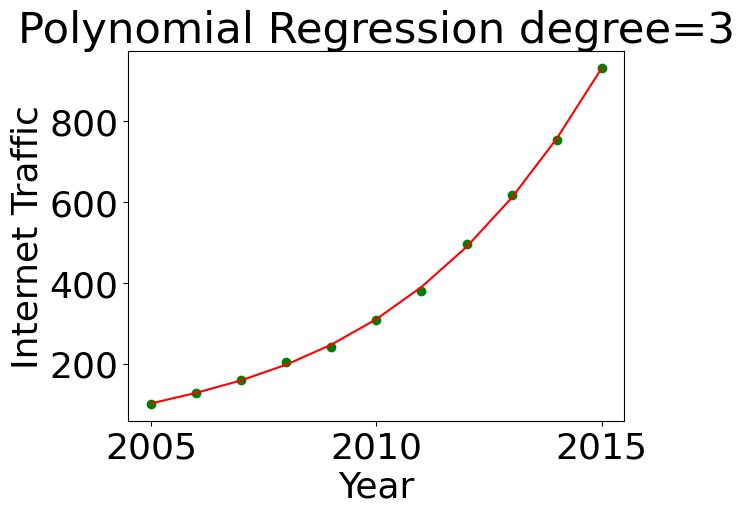

In [142]:
plt.scatter(x, y, color='green')
plt.plot(x, y_pred, color = 'red')

plt.title("Polynomial Regression degree=3")
plt.xlabel('Year')
plt.ylabel('Internet Traffic')


plt.show();

Supplementary Activity:
* Choose your own dataset
* Import the dataset
* Perform polynomial regression using sklearn and polyfit
* Measure the performance for each polynomial degree.
* Plot the performance of the model for each polynomial degree.


In [143]:
suppath = '/content/drive/MyDrive/DATASETS/Advertising Budget and Sales.csv'
suppdf = pd.read_csv(suppath)
suppdf.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [144]:
# cleaning the data
suppdf.drop(columns=['Unnamed: 0'], inplace=True)
suppdf.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [145]:
# renaming columns
suppdf.rename(columns={'TV Ad Budget ($)':'TVBudget(USD)',
                       'Radio Ad Budget ($)':'RadioBudget(USD)',
                       'Newspaper Ad Budget ($)':'NewspaperBudget(USD)',
                       'Sales ($)':'Sales(USD)'}, inplace=True)
suppdf.head()

,TVBudget(USD),RadioBudget(USD),NewspaperBudget(USD),Sales(USD)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [146]:
# checking for null values
suppdf.isnull().sum()

,0
TVBudget(USD),0
RadioBudget(USD),0
NewspaperBudget(USD),0
Sales(USD),0


In [147]:
# getting the independent variable and dependent variable
x = suppdf['TVBudget(USD)'].values/np.max(suppdf['TVBudget(USD)'].values)
y = suppdf['Sales(USD)']

Text(0, 0.5, 'sales')

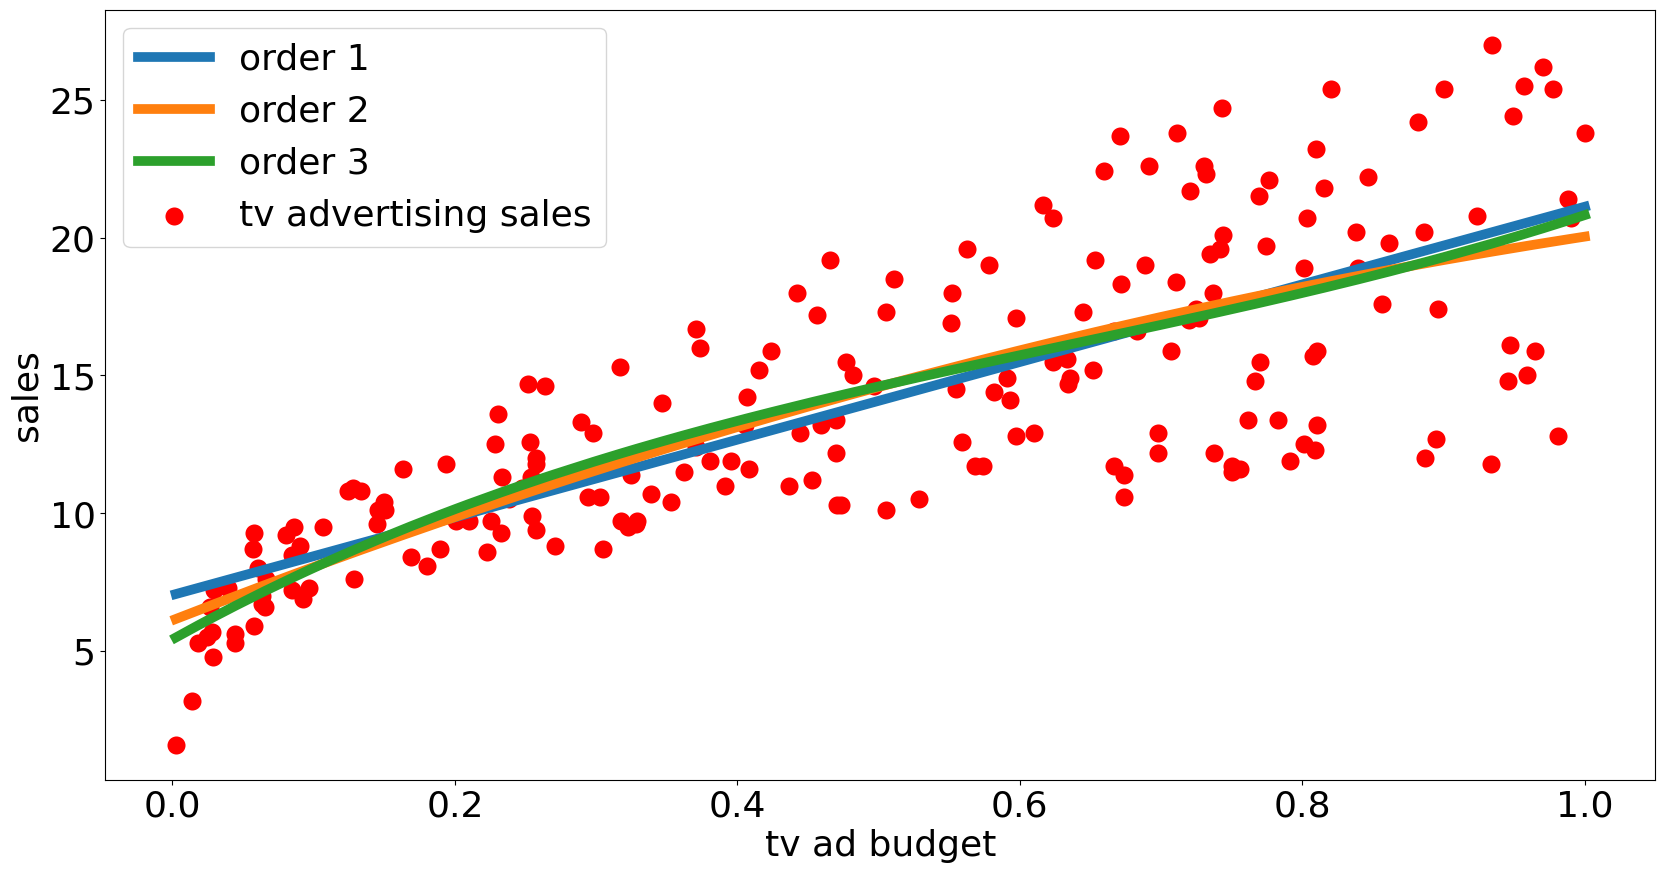

In [148]:
#fitting and graphing the model
models = []       # to store polynomial model parameters (list of poly1d objects)

for order in range(1,4):# loop for fitting the polynomial regression per degree
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)

plt.figure(figsize = (20,10))

for model in models[0:3]: # loop for graphing the model per order in polynomial regression
    plt.plot(sorted(x), model(x)[np.argsort(x.ravel())], label = 'order ' + str(len(model)), linewidth = 7)

plt.scatter(x, y, label = 'tv advertising sales', linewidth = 7,color='red')
plt.legend(loc = 'upper left')

# Adding axis labels
plt.xlabel('tv ad budget')
plt.ylabel('sales')

In [149]:
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for model in models[0:3]:
    mse = np.sum(e**2)/len(df_hist) # get the mean error of every order model
    mse_hist.append(mse) # store the mse in the list

In [166]:
ord = 1
for order in range(0,3):
  print(f'order {ord} mean error:', mse_hist[order])
  ord += 1

order 1 mean error: 191.13914392103197
order 2 mean error: 187.61205509549927
order 3 mean error: 186.15210094717514


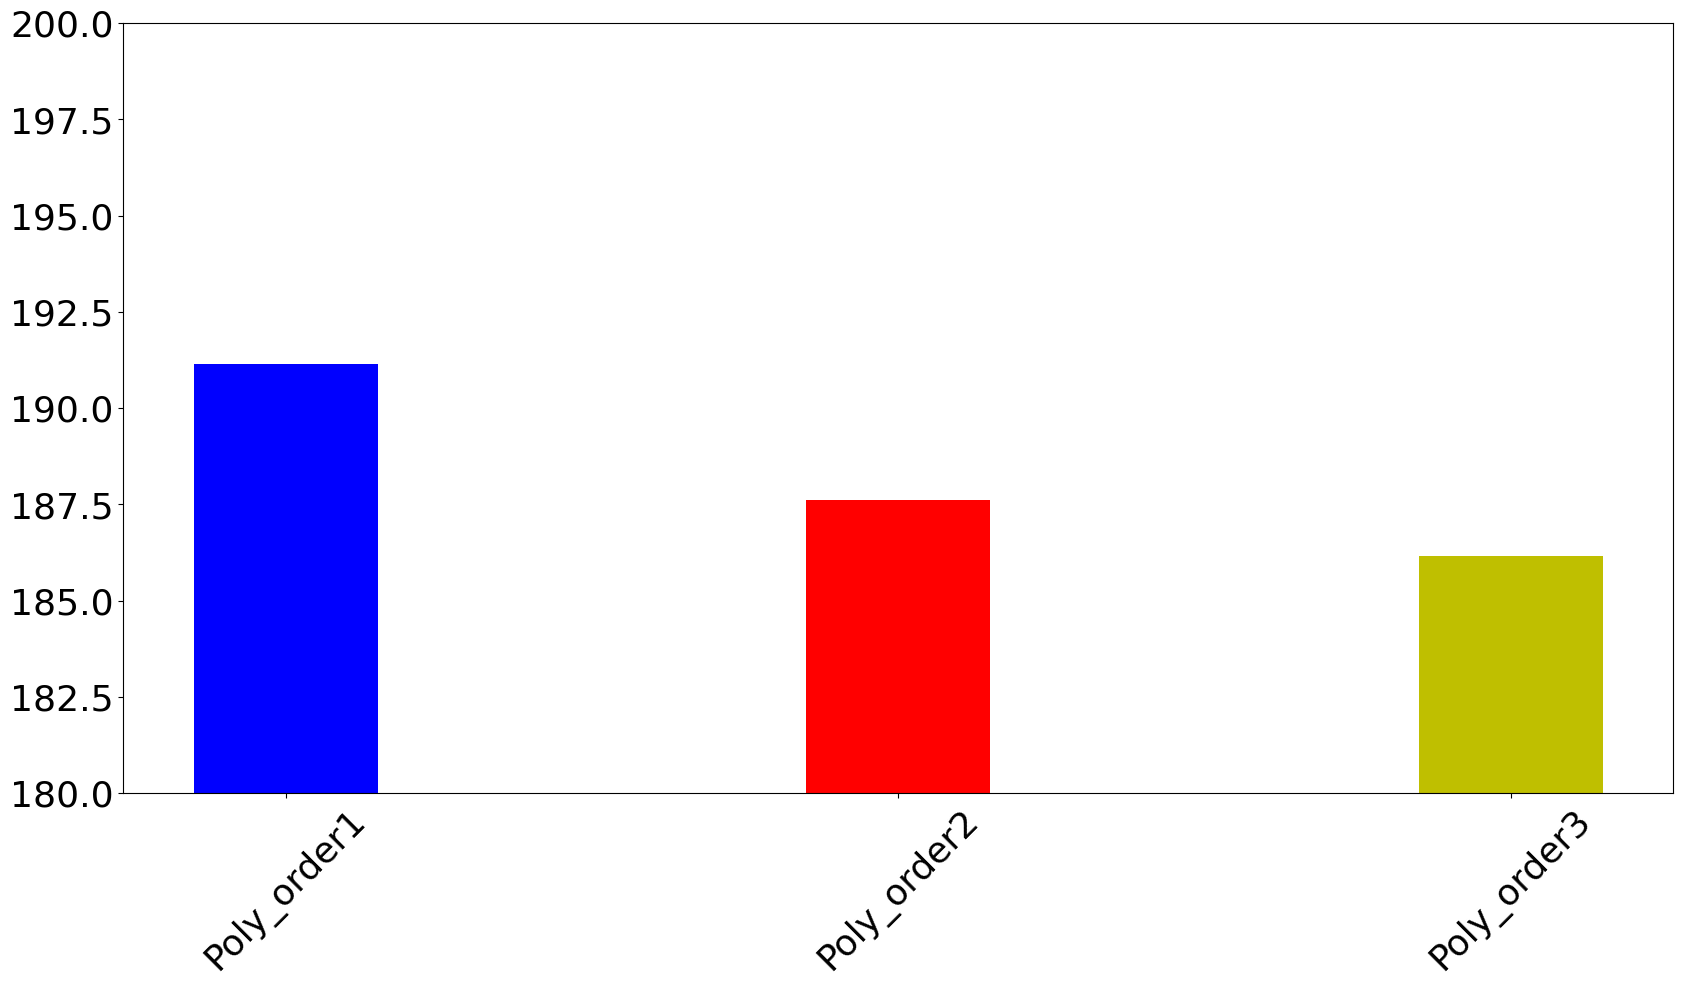

In [168]:
#graphing the mean error of the model we created
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2])
p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')

plt.ylim(180,200) #zooms in the value of y limit
ax.set_xticks(ticks=[0.0,1.0,2.0],labels=['Poly_order1', 'Poly_order2', 'Poly_order3'], rotation=45)

Conclusion:

what I learn today in this activity is about polynomial regression, how to model it, evaluate it by getting the mean error, and the absolute error, I learned that by fitting the polynomial comes with the value called order the value of the order of the poly regression is inversely proportional to the error of the model, I also concluded that as order of the poly fit increases the more it joins the trend of the datapoints of our dataset